In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
fit_run = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-guesses.xlsx')
make_fit = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\all-final-var.xlsx')

In [3]:
data = pd.concat([fit_run, make_fit], axis=1)

In [4]:
data.columns

Index(['Source.Name', 'Date', 'averaging', 'Direction', 'Data type',
       'distance_au', 'STEP', 'EPT', 'HET', 'Sigma', 'Relative error',
       'Fraction of nan', 'Leave first HET channel out', 'Shift STEP data',
       'type_of_fit', 'Fit to', 'Window', 'which_fit', 'gamma1_guess',
       'gamma2_guess', 'c1_guess', 'alpha_guess', 'break_guess_mev',
       'cutoff_guess_mev', 'Use random', 'Iterations', 'min_e_mev',
       'max_e_mev', 'Source.Name', 'final_fit_type', 'Reduced chi sq', 'c1',
       'c1_err', 'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err',
       'break_point_mev', 'break_point_err_mev', 'exp_cutoff_point_mev',
       'cutoff_err_mev', 'alpha', 'year', 'month', 'day', 'time', 'fit'],
      dtype='object')

In [5]:
step_ept = data.where( (data.type_of_fit == "step_ept") & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het") & (data.Date >np.datetime64('2021-10-12')) , np.nan)
step = data.where( (data.type_of_fit == "step" ) , np.nan)
ept = data.where( (data.type_of_fit == "ept") , np.nan)

one_step_ept = step_ept.where((step_ept.averaging == "1min"), np.nan)
two_step_ept = step_ept.where((step_ept.averaging == "2min"), np.nan)
five_step_ept= step_ept.where((step_ept.averaging == "5min"), np.nan)

one_ept_het = ept_het.where((ept_het.averaging == "1min"), np.nan)
two_ept_het = ept_het.where((ept_het.averaging == "2min"), np.nan)
five_ept_het= ept_het.where((ept_het.averaging == "5min"), np.nan)

one_step = step.where((step.averaging == "1min"), np.nan)
two_step = step.where((step.averaging == "2min"), np.nan)
five_step= step.where((step.averaging == "5min"), np.nan)

one_ept = ept.where((ept.averaging == "1min"), np.nan)
two_ept = ept.where((ept.averaging == "2min"), np.nan)
five_ept= ept.where((ept.averaging == "5min"), np.nan)

In [6]:
ept_one_two = []
ept_two_one = []
for i in range(len(one_ept['Reduced chi sq'])):
    for j in range(len(two_ept['Reduced chi sq'])):
        if one_ept.year[i]==two_ept.year[j] and one_ept.month[i]==two_ept.month[j] and one_ept.day[i]==two_ept.day[j] and one_ept.time[i]==two_ept.time[j]:
            ept_one_two.append(one_ept['Reduced chi sq'][i])
            ept_two_one.append(two_ept['Reduced chi sq'][j])
            


In [7]:
step_ept_one_two = []
step_ept_two_one = []
for i in range(len(one_step_ept['Reduced chi sq'])):
    for j in range(len(two_step_ept['Reduced chi sq'])):
        if one_step_ept.year[i]==two_step_ept.year[j] and one_step_ept.month[i]==two_step_ept.month[j] and one_step_ept.day[i]==two_step_ept.day[j] and one_step_ept.time[i]==two_step_ept.time[j]:
            step_ept_one_two.append(one_step_ept['Reduced chi sq'][i])
            step_ept_two_one.append(two_step_ept['Reduced chi sq'][j])
            


In [8]:
ept_het_one_two = []
ept_het_two_one = []
for i in range(len(one_ept_het['Reduced chi sq'])):
    for j in range(len(two_ept_het['Reduced chi sq'])):
        if one_ept_het.year[i]==two_ept_het.year[j] and one_ept_het.month[i]==two_ept_het.month[j] and one_ept_het.day[i]==two_ept_het.day[j] and one_ept_het.time[i]==two_ept_het.time[j]:
            ept_het_one_two.append(one_ept_het['Reduced chi sq'][i])
            ept_het_two_one.append(two_ept_het['Reduced chi sq'][j])
            

In [9]:
step_one_two = []
step_two_one = []
for i in range(len(one_step['Reduced chi sq'])):
    for j in range(len(two_step['Reduced chi sq'])):
        if one_step.year[i]==two_step.year[j] and one_step.month[i]==two_step.month[j] and one_step.day[i]==two_step.day[j] and one_step.time[i]==two_step.time[j]:
            step_one_two.append(one_step['Reduced chi sq'][i])
            step_two_one.append(two_step['Reduced chi sq'][j])
            

In [10]:
ept_one_five = []
ept_five_one = []

for i in range(len(one_ept['Reduced chi sq'])):
    for j in range(len(five_ept['Reduced chi sq'])):
        if one_ept.year[i]==five_ept.year[j] and one_ept.month[i]==five_ept.month[j] and one_ept.day[i]==five_ept.day[j] and one_ept.time[i]==five_ept.time[j]:
            ept_one_five.append(one_ept['Reduced chi sq'][i])
            ept_five_one.append(five_ept['Reduced chi sq'][j])
            

In [11]:
step_ept_one_five = []
step_ept_five_one = []

for i in range(len(one_step_ept['Reduced chi sq'])):
    for j in range(len(five_step_ept['Reduced chi sq'])):
        if one_step_ept.year[i]==five_step_ept.year[j] and one_step_ept.month[i]==five_step_ept.month[j] and one_step_ept.day[i]==five_step_ept.day[j] and one_step_ept.time[i]==five_step_ept.time[j]:
            step_ept_one_five.append(one_step_ept['Reduced chi sq'][i])
            step_ept_five_one.append(five_step_ept['Reduced chi sq'][j])
            

In [12]:
ept_het_one_five = []
ept_het_five_one = []

for i in range(len(one_ept_het['Reduced chi sq'])):
    for j in range(len(five_ept_het['Reduced chi sq'])):
        if one_ept_het.year[i]==five_ept_het.year[j] and one_ept_het.month[i]==five_ept_het.month[j] and one_ept_het.day[i]==five_ept_het.day[j] and one_ept_het.time[i]==five_ept_het.time[j]:
            ept_het_one_five.append(one_ept_het['Reduced chi sq'][i])
            ept_het_five_one.append(five_ept_het['Reduced chi sq'][j])
            

In [13]:
step_one_five = []
step_five_one = []

for i in range(len(one_step['Reduced chi sq'])):
    for j in range(len(five_step['Reduced chi sq'])):
        if one_step.year[i]==five_step.year[j] and one_step.month[i]==five_step.month[j] and one_step.day[i]==five_step.day[j] and one_step.time[i]==five_step.time[j]:
            step_one_five.append(one_step['Reduced chi sq'][i])
            step_five_one.append(five_step['Reduced chi sq'][j])
            

In [14]:
step_five_one

[1.5105317227830748,
 3.3260749847548707,
 14.6664992852307,
 1.8844907161684443,
 3.3288986217768533,
 3.091761969840506,
 27.54974353530542,
 3.4126664741606065,
 4.967776366658995,
 10.224113420699398,
 29.171476983403597,
 16.009744627568242,
 1.4566538724741334,
 1.0508274077719044,
 3.751094602831712,
 51.42304109745227,
 2.504312004456971,
 1.2984465436738544,
 6.260348843748846,
 2.7530650331591398]

In [15]:
ept_two_five = []
ept_five_two = []

for i in range(len(two_ept['Reduced chi sq'])):
    for j in range(len(five_ept['Reduced chi sq'])):
        if two_ept.year[i]==five_ept.year[j] and two_ept.month[i]==five_ept.month[j] and two_ept.day[i]==five_ept.day[j] and two_ept.time[i]==five_ept.time[j]:
            ept_two_five.append(two_ept['Reduced chi sq'][i])
            ept_five_two.append(five_ept['Reduced chi sq'][j])
                    

In [16]:
step_ept_two_five = []
step_ept_five_two = []

for i in range(len(two_step_ept['Reduced chi sq'])):
    for j in range(len(five_step_ept['Reduced chi sq'])):
        if two_step_ept.year[i]==five_step_ept.year[j] and two_step_ept.month[i]==five_step_ept.month[j] and two_step_ept.day[i]==five_step_ept.day[j] and two_step_ept.time[i]==five_step_ept.time[j]:
            step_ept_two_five.append(two_step_ept['Reduced chi sq'][i])
            step_ept_five_two.append(five_step_ept['Reduced chi sq'][j])
            

In [17]:
ept_het_two_five = []
ept_het_five_two = []

for i in range(len(two_ept_het['Reduced chi sq'])):
    for j in range(len(five_ept_het['Reduced chi sq'])):
        if two_ept_het.year[i]==five_ept_het.year[j] and two_ept_het.month[i]==five_ept_het.month[j] and two_ept_het.day[i]==five_ept_het.day[j] and two_ept_het.time[i]==five_ept_het.time[j]:
            ept_het_two_five.append(two_ept_het['Reduced chi sq'][i])
            ept_het_five_two.append(five_ept_het['Reduced chi sq'][j])
                     

In [18]:
step_two_five = []
step_five_two = []

for i in range(len(two_step['Reduced chi sq'])):
    for j in range(len(five_step['Reduced chi sq'])):
        if two_step.year[i]==five_step.year[j] and two_step.month[i]==five_step.month[j] and two_step.day[i]==five_step.day[j] and two_step.time[i]==five_step.time[j]:
            step_two_five.append(two_step['Reduced chi sq'][i])
            step_five_two.append(five_step['Reduced chi sq'][j])
            

In [19]:
n_ept_one_two = str(len(ept_one_two))
n_ept_one_five = str(len(ept_one_five))
n_ept_two_five = str(len(ept_two_five))

n_step_ept_one_two = str(len(step_ept_one_two))
n_step_ept_one_five = str(len(step_ept_one_five))
n_step_ept_two_five = str(len(step_ept_two_five))

n_ept_het_one_two = str(len(ept_het_one_two))
n_ept_het_one_five = str(len(ept_het_one_five))
n_ept_het_two_five = str(len(ept_het_two_five))

n_step_one_two = str(len(step_one_two))
n_step_one_five = str(len(step_one_five))
n_step_two_five = str(len(step_two_five))


In [20]:
x = range(-1,90)
y = range(-1,90)

In [21]:
mean52_step = -2.984543642133002
std52_step = 5.968543389060794
mean51_step =  -4.705037719539914
std51_step = 8.175455221524636
mean12_step = 1.720494077406913
std12_step = 3.183171389519028

mean52_ept = 0.03853931040588195
std52_ept = 0.19705638708147713
mean51_ept = 0.043879011679595126
std51_ept = 0.2212263377413162
mean12_ept = -0.009175858256388787
std12_ept = 0.19558964221825736

mean52_step_ept = -3.1686751968160363
std52_step_ept = 4.415293675296934
mean51_step_ept =  -4.228037361482359
std51_step_ept = 5.2402199385493216
mean12_step_ept = 1.0593621646663236
std12_step_ept = 1.9421328093096648

mean52_ept_het = 0.10484177248384166
std52_ept_het = 0.42960053460184033
mean51_ept_het =  0.17599359798121295
std51_ept_het = 0.5506602755456199
mean12_ept_het = -0.1530053331397111
std12_ept_het = 0.49531330684071645

In [22]:
y12_ept = []
y51_ept = []
y52_ept = []

spanmin12_ept = []
spanmin51_ept = []
spanmin52_ept = []

spanmax12_ept =[]
spanmax51_ept =[]
spanmax52_ept =[]

y12_step = []
y51_step = []
y52_step = []

spanmin12_step = []
spanmin51_step = []
spanmin52_step = []

spanmax12_step =[]
spanmax51_step =[]
spanmax52_step =[]

y12_step_ept = []
y51_step_ept = []
y52_step_ept = []

spanmin12_step_ept = []
spanmin51_step_ept = []
spanmin52_step_ept = []

spanmax12_step_ept =[]
spanmax51_step_ept =[]
spanmax52_step_ept =[]

y12_ept_het = []
y51_ept_het = []
y52_ept_het = []

spanmin12_ept_het = []
spanmin51_ept_het = []
spanmin52_ept_het = []

spanmax12_ept_het =[]
spanmax51_ept_het =[]
spanmax52_ept_het =[]


for i in x:
    y12_ept.append(i+mean12_ept)
    y51_ept.append(i+mean51_ept)
    y52_ept.append(i+mean52_ept)
    
    spanmin12_ept.append(i+mean12_ept-std12_ept)
    spanmin51_ept.append(i+mean51_ept-std51_ept)
    spanmin52_ept.append(i+mean52_ept-std52_ept)
    
    spanmax12_ept.append(i+mean12_ept+std12_ept)
    spanmax51_ept.append(i+mean51_ept+std51_ept)
    spanmax52_ept.append(i+mean52_ept+std52_ept)
    
    y12_step.append(i+mean12_step)
    y51_step.append(i+mean51_step)
    y52_step.append(i+mean52_step)
    
    spanmin12_step.append(i+mean12_step-std12_step)
    spanmin51_step.append(i+mean51_step-std51_step)
    spanmin52_step.append(i+mean52_step-std52_step)
    
    spanmax12_step.append(i+mean12_step+std12_step)
    spanmax51_step.append(i+mean51_step+std51_step)
    spanmax52_step.append(i+mean52_step+std52_step)
    
    y12_step_ept.append(i+mean12_step_ept)
    y51_step_ept.append(i+mean51_step_ept)
    y52_step_ept.append(i+mean52_step_ept)
    
    spanmin12_step_ept.append(i+mean12_step_ept-std12_step_ept)
    spanmin51_step_ept.append(i+mean51_step_ept-std51_step_ept)
    spanmin52_step_ept.append(i+mean52_step_ept-std52_step_ept)
    
    spanmax12_step_ept.append(i+mean12_step_ept+std12_step_ept)
    spanmax51_step_ept.append(i+mean51_step_ept+std51_step_ept)
    spanmax52_step_ept.append(i+mean52_step_ept+std52_step_ept)
    
    y12_ept_het.append(i+mean12_ept_het)
    y51_ept_het.append(i+mean51_ept_het)
    y52_ept_het.append(i+mean52_ept_het)
    
    spanmin12_ept_het.append(i+mean12_ept_het-std12_ept_het)
    spanmin51_ept_het.append(i+mean51_ept_het-std51_ept_het)
    spanmin52_ept_het.append(i+mean52_ept_het-std52_ept_het)
    
    spanmax12_ept_het.append(i+mean12_ept_het+std12_ept_het)
    spanmax51_ept_het.append(i+mean51_ept_het+std51_ept_het)
    spanmax52_ept_het.append(i+mean52_ept_het+std52_ept_het)
    
    

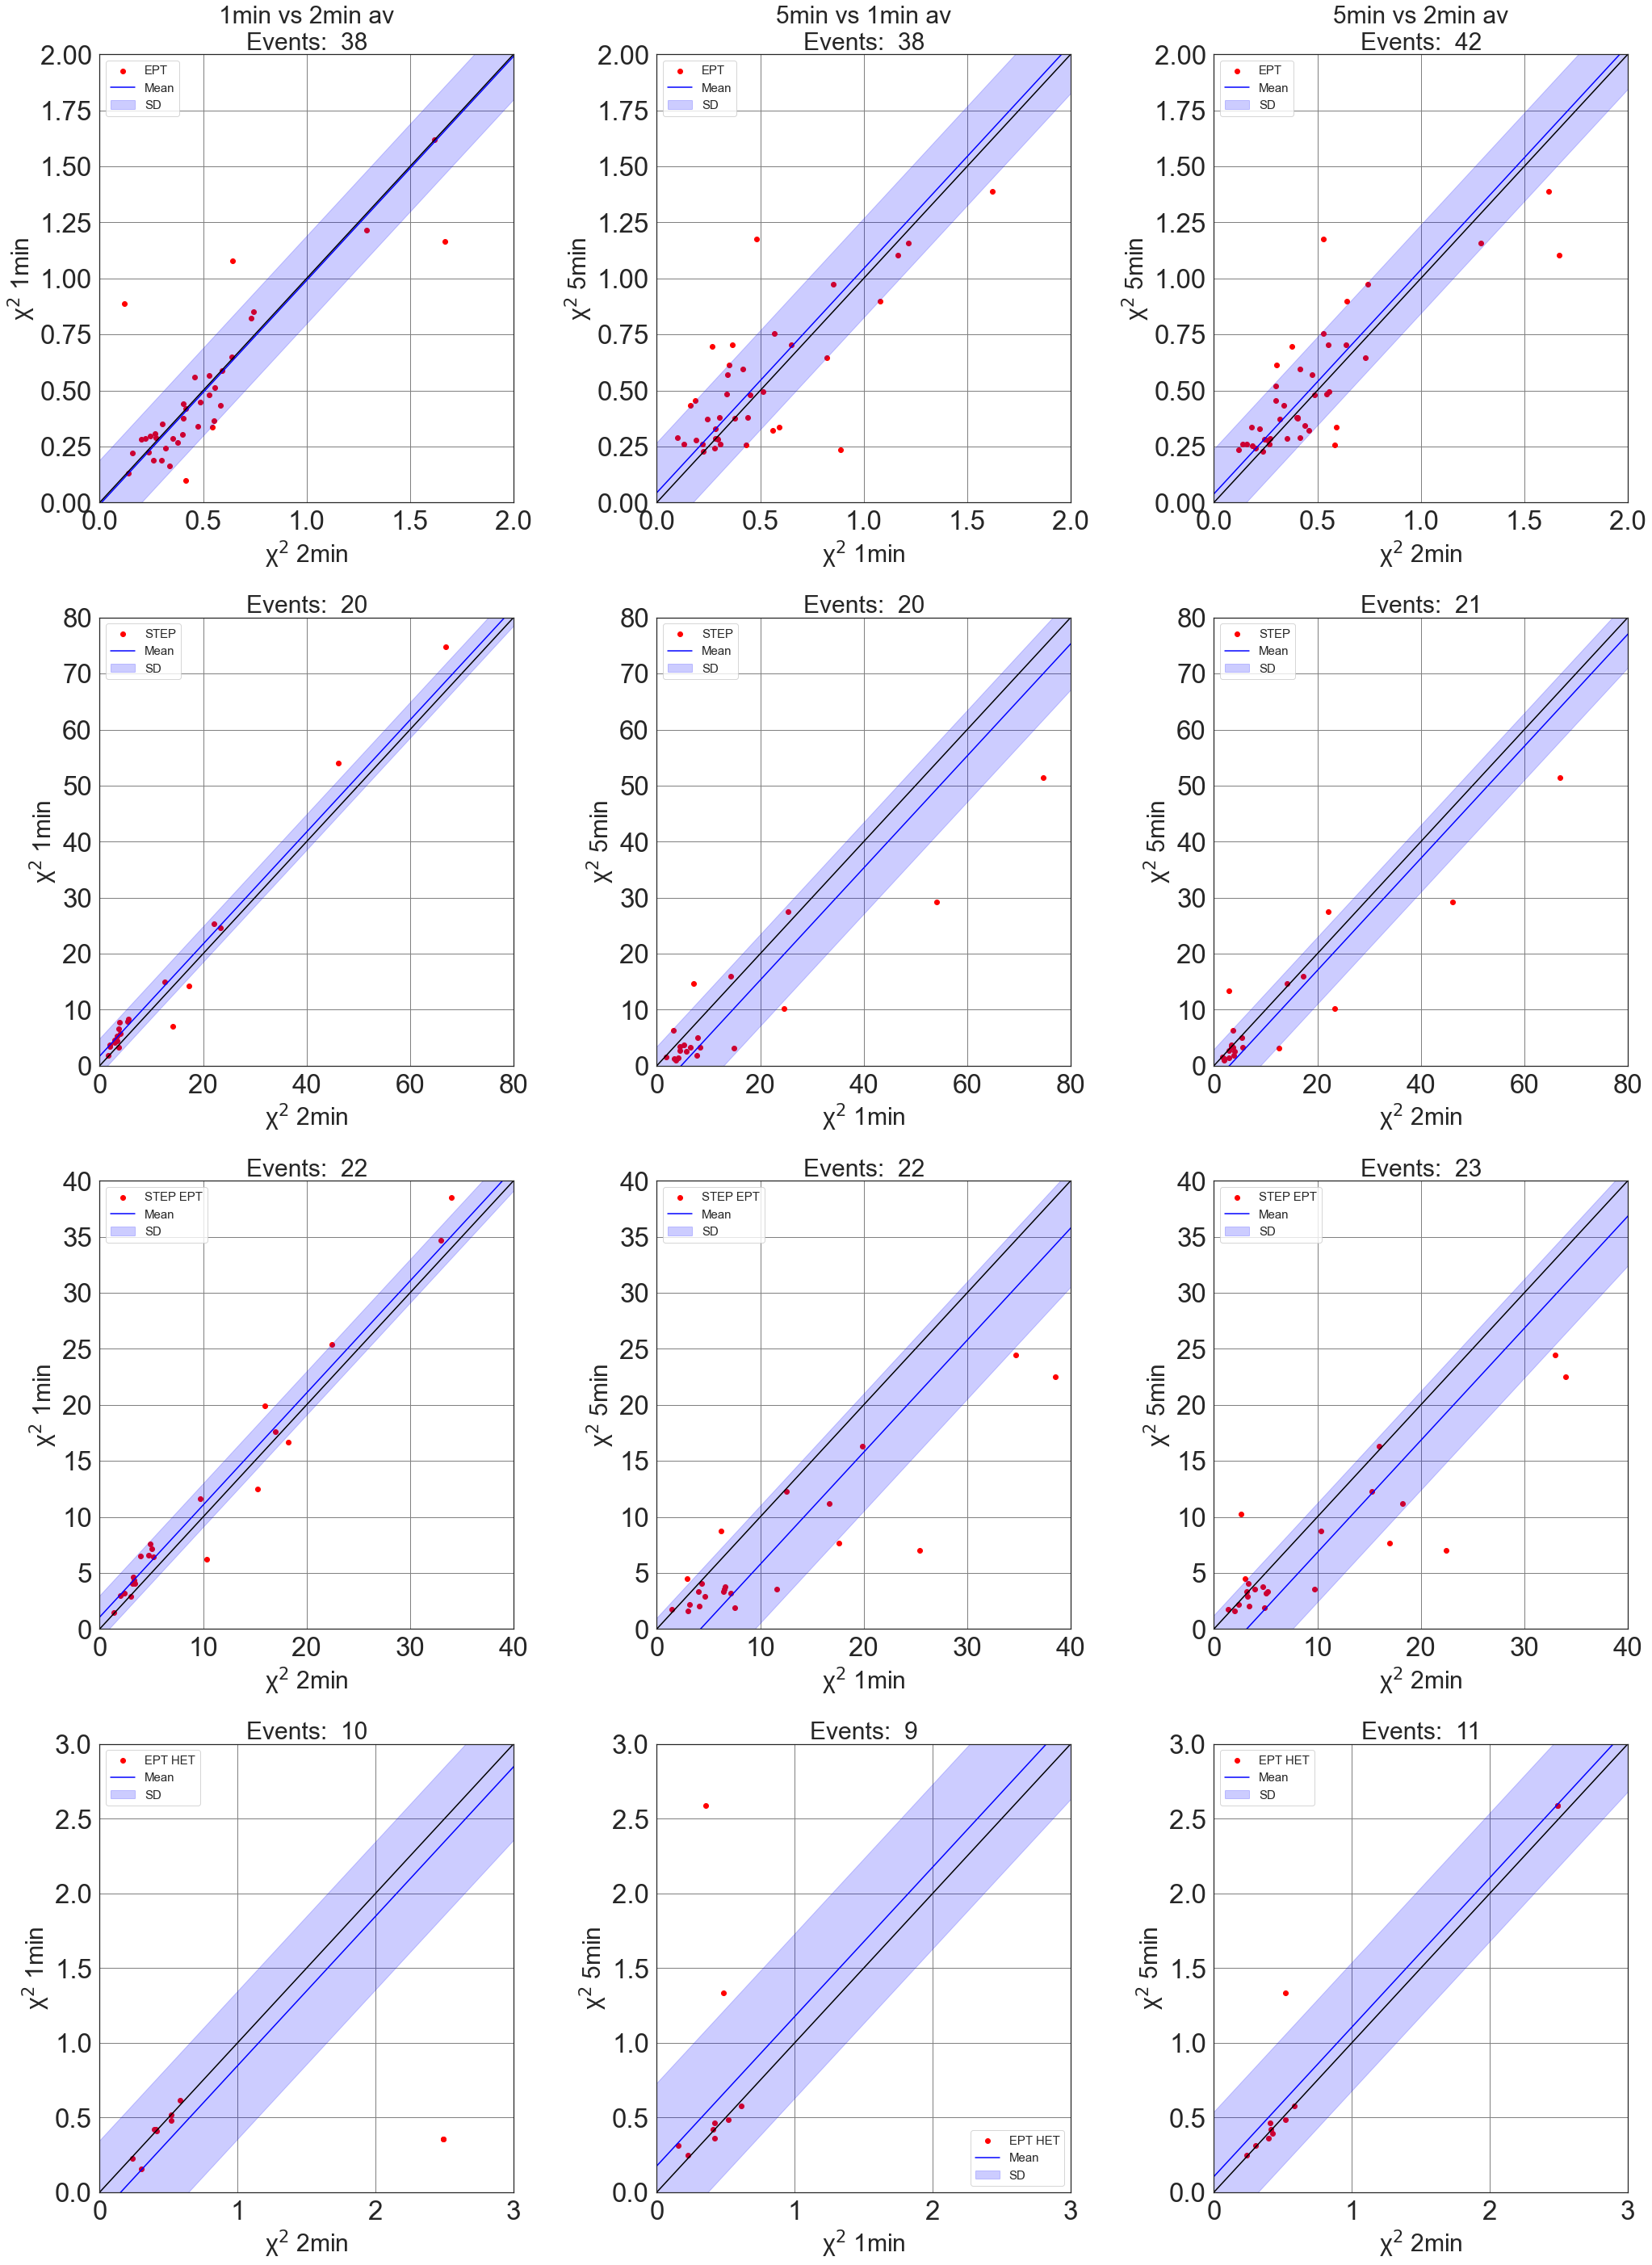

In [24]:
f, ax = plt.subplots(4,3, figsize=(30,40)) 
sns.set_theme(style="white",font_scale = 3)
s = 30
f.tight_layout(pad=2.5)

ax[0,0].scatter(y=ept_one_two, x=ept_two_one, color='red', label = 'EPT')#, label='Flux average')
ax[1,0].scatter(y=step_one_two, x=step_two_one, color='red', label = 'STEP')#, label='Flux average')
ax[2,0].scatter(y=step_ept_one_two, x=step_ept_two_one, color='red', label = 'STEP EPT')#, label='Flux average')
ax[3,0].scatter(y=ept_het_one_two, x=ept_het_two_one,  color='red', label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('1min vs 2min av'+'\n'+'Events:  '+ n_ept_one_two, size = s)
ax[1,0].set_title('Events:  '+ n_step_one_two, size = s)
ax[2,0].set_title('Events:  '+ n_step_ept_one_two, size = s)
ax[3,0].set_title('Events:  '+ n_ept_het_one_two, size = s)


ax[0,1].scatter(x=ept_one_five, y=ept_five_one, color='red', label = 'EPT')#, label='Flux average')
ax[1,1].scatter(x=step_one_five, y=step_five_one,  color='red', label = 'STEP')#, label='Flux average')
ax[2,1].scatter(x=step_ept_one_five, y=step_ept_five_one,  color='red', label = 'STEP EPT')#, label='Flux average')
ax[3,1].scatter(x=ept_het_one_five, y=ept_het_five_one, color='red', label = 'EPT HET')#, label='Flux average')

ax[0,1].set_title('5min vs 1min av'+'\n'+'Events:  '+ n_ept_one_five, size = s)
ax[1,1].set_title('Events:  '+ n_step_one_five, size = s)
ax[2,1].set_title('Events:  '+ n_step_ept_one_five, size = s)
ax[3,1].set_title('Events:  '+ n_ept_het_one_five, size = s)
    


ax[0,2].scatter(x=ept_two_five, y=ept_five_two, color='red', label = 'EPT')#, label='Flux average')
ax[1,2].scatter(x=step_two_five, y=step_five_two,  color='red', label = 'STEP')#, label='Flux average')
ax[2,2].scatter(x=step_ept_two_five, y=step_ept_five_two,  color='red', label = 'STEP EPT')#, label='Flux average')
ax[3,2].scatter(x=ept_het_two_five, y=ept_het_five_two,  color='red', label = 'EPT HET')#, label='Flux average')

ax[0,2].set_title('5min vs 2min av'+'\n'+'Events:  '+ n_ept_two_five, size = s)
ax[1,2].set_title('Events:  '+ n_step_two_five, size = s)
ax[2,2].set_title('Events:  '+ n_step_ept_two_five, size = s)
ax[3,2].set_title('Events:  '+ n_ept_het_two_five, size = s)
    
    
ax[0,0].plot(x,y12_ept, color = 'blue', label = 'Mean')
ax[1,0].plot(x,y12_step, color = 'blue', label = 'Mean')
ax[2,0].plot(x,y12_step_ept, color = 'blue', label = 'Mean')
ax[3,0].plot(x,y12_ept_het, color = 'blue', label = 'Mean')


ax[0,1].plot(x,y51_ept, color = 'blue', label = 'Mean')
ax[1,1].plot(x,y51_step, color = 'blue', label = 'Mean')
ax[2,1].plot(x,y51_step_ept, color = 'blue', label = 'Mean')
ax[3,1].plot(x,y51_ept_het, color = 'blue', label = 'Mean')

ax[0,2].plot(x,y52_ept, color = 'blue', label = 'Mean')
ax[1,2].plot(x,y52_step, color = 'blue', label = 'Mean')
ax[2,2].plot(x,y52_step_ept, color = 'blue', label = 'Mean')
ax[3,2].plot(x,y52_ept_het, color = 'blue', label = 'Mean')

ax[0,0].fill_between(x, spanmin12_ept , spanmax12_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,0].fill_between(x, spanmin12_step , spanmax12_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,0].fill_between(x, spanmin12_step_ept , spanmax12_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,0].fill_between(x, spanmin12_ept_het , spanmax12_ept_het, color = 'blue', alpha = 0.2, label = 'SD')

ax[0,1].fill_between(x, spanmin51_ept , spanmax51_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,1].fill_between(x, spanmin51_step , spanmax51_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,1].fill_between(x, spanmin51_step_ept , spanmax51_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,1].fill_between(x, spanmin51_ept_het , spanmax51_ept_het, color = 'blue', alpha = 0.2, label = 'SD')

ax[0,2].fill_between(x, spanmin52_ept , spanmax52_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[1,2].fill_between(x, spanmin52_step , spanmax52_step, color = 'blue', alpha = 0.2, label = 'SD')
ax[2,2].fill_between(x, spanmin52_step_ept , spanmax52_step_ept, color = 'blue', alpha = 0.2, label = 'SD')
ax[3,2].fill_between(x, spanmin52_ept_het , spanmax52_ept_het, color = 'blue', alpha = 0.2, label = 'SD')


for i in range(4):
    ax[i,0].set_xlabel(chr(967)+r'$^2$ 2min', size=s)
    ax[i,0].set_ylabel(chr(967)+r'$^2$ 1min', size=s)  
    ax[i,0].grid(color = 'gray')
    ax[i,0].legend(prop={'size': 15})
    ax[i,0].plot(x,y, color = 'black')

    ax[i,1].set_xlabel(chr(967)+r'$^2$ 1min', size=s)
    ax[i,1].set_ylabel(chr(967)+r'$^2$ 5min', size=s)
    ax[i,1].grid(color = 'gray')
    ax[i,1].legend(prop={'size': 15})
    ax[i,1].plot(x,y, color = 'black')

    ax[i,2].set_xlabel(chr(967)+r'$^2$ 2min', size=s)
    ax[i,2].set_ylabel(chr(967)+r'$^2$ 5min', size=s)
    ax[i,2].grid(color = 'gray')
    ax[i,2].legend(prop={'size': 15})
    ax[i,2].plot(x,y, color = 'black')
    #ax[i,2].set_xlim(0,5)
    #ax[i,2].set_ylim(0,5)

for i in range(3):
    ax[0,i].set_xlim(0,2)
    ax[0,i].set_ylim(0,2)
    
    ax[1,i].set_xlim(0,80)
    ax[1,i].set_ylim(0,80)
    
    ax[2,i].set_xlim(0,40)
    ax[2,i].set_ylim(0,40)
    
    ax[3,i].set_xlim(0,3)
    ax[3,i].set_ylim(0,3)
    

#plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)4plt.yticks(size=s)

plt.show()


In [34]:
for i in range(945, 969):
    print(chr(i))

α
β
γ
δ
ε
ζ
η
θ
ι
κ
λ
μ
ν
ξ
ο
π
ρ
ς
σ
τ
υ
φ
χ
ψ


In [35]:
chr(967)

'χ'

In [36]:
chr(961)

'ρ'